In [2]:
import numpy as np
import pandas as pd
# Import and read dataset
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# Checking if any rows are missing any data.
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# Determine count of unique values for each column in the dataframe
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [8]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
numerical =  df.select_dtypes(include=[np.number])
numerical.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [11]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

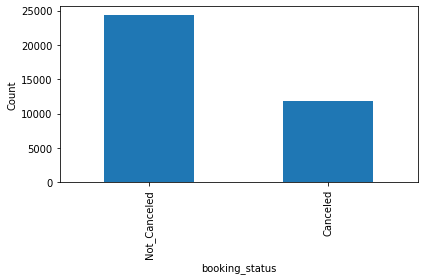

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [12]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df['booking_status'].value_counts().plot.bar()
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

categorical.booking_status.value_counts()

In [13]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


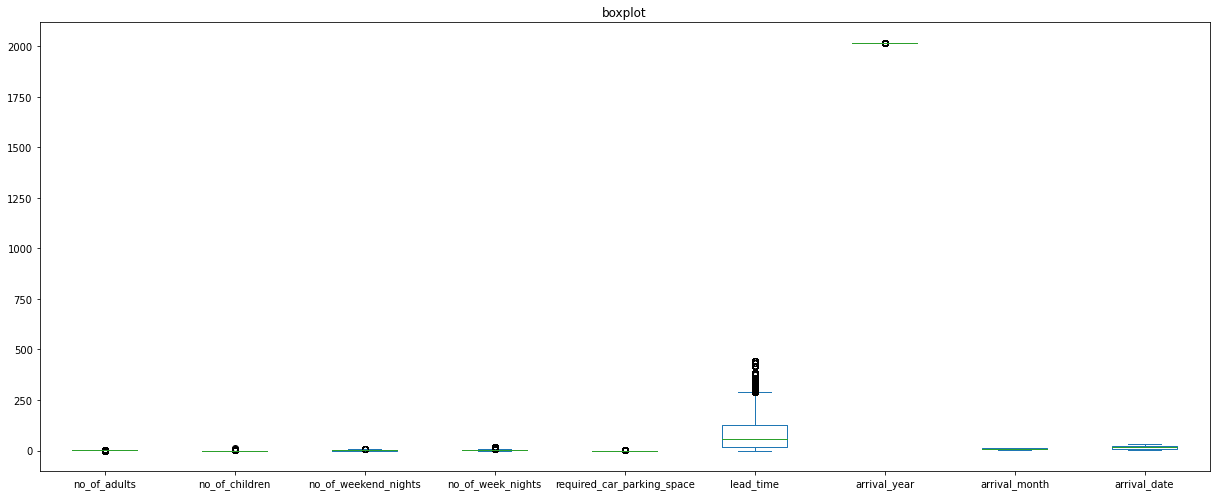

In [14]:
plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True
ax = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date']].plot(kind='box', title='boxplot')
plt.show()

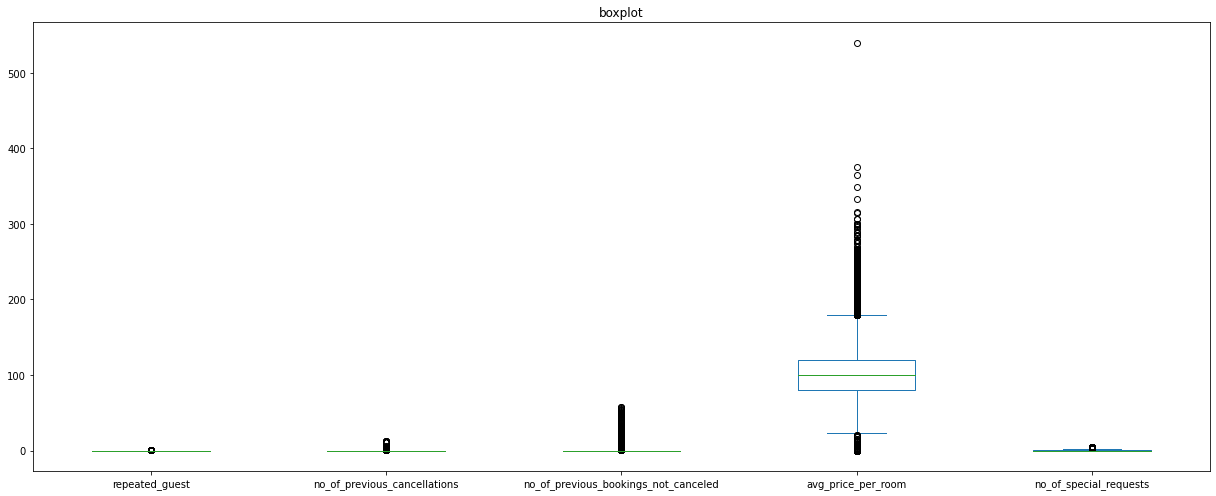

In [15]:
plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True
ax = df[['repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']].plot(kind='box', title='boxplot')
plt.show()

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='Density'>

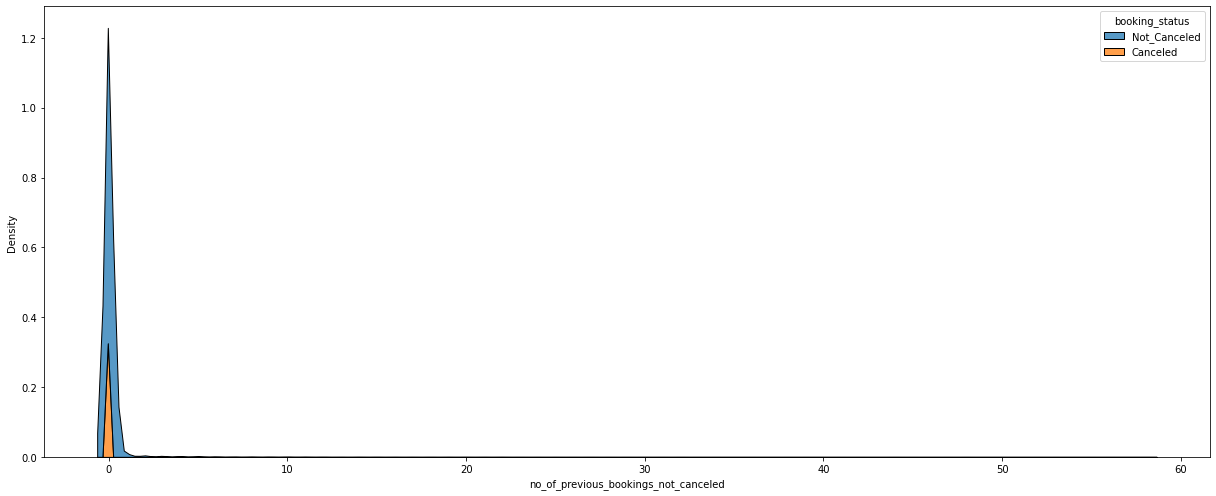

In [16]:
sns.kdeplot(data=df, x="no_of_previous_bookings_not_canceled", hue="booking_status", multiple="stack")

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

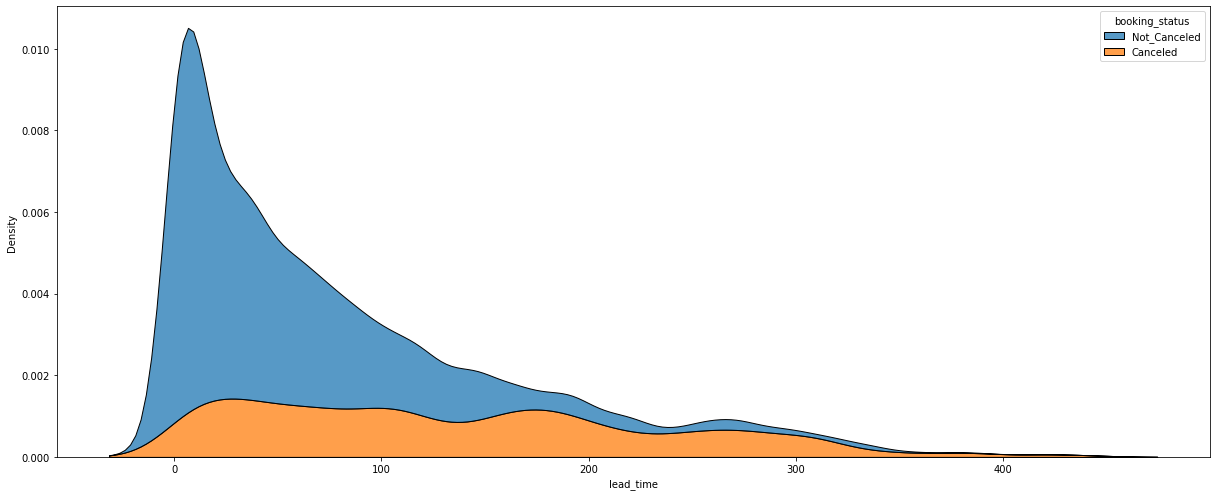

In [17]:
sns.kdeplot(data=df, x="lead_time", hue="booking_status", multiple="stack")

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

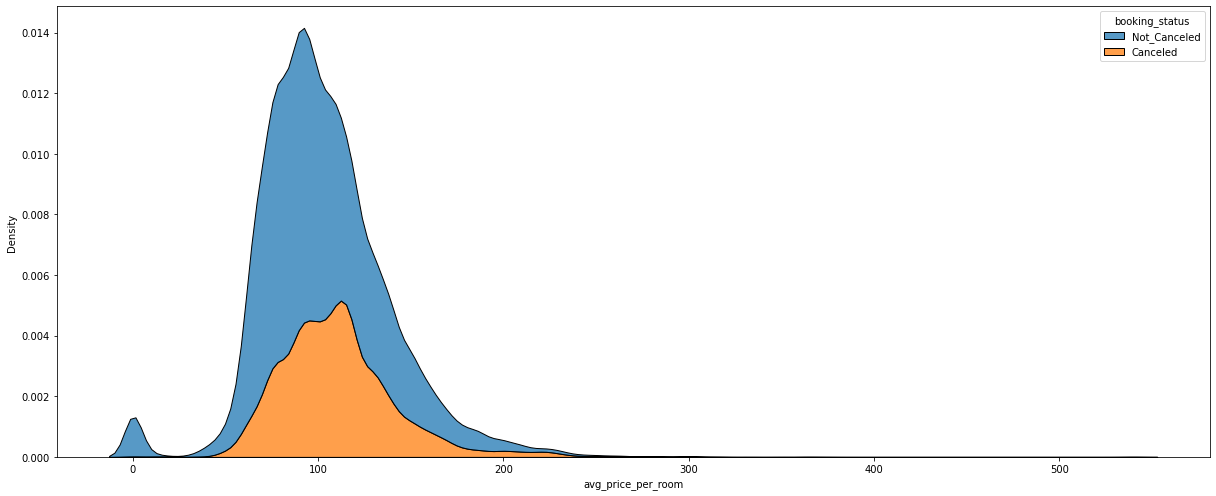

In [18]:
sns.kdeplot(data=df, x="avg_price_per_room", hue="booking_status", multiple="stack")

In [19]:
# converting target variable into numerical value
df['booking_status'] = np.where((df['booking_status'] == 'Canceled'),1,0)

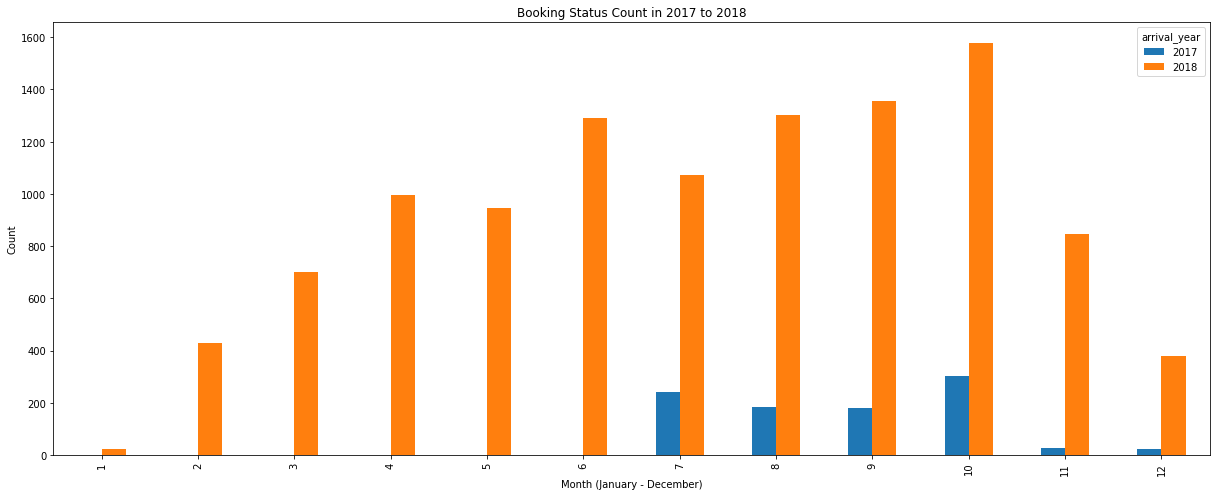

In [20]:
df.groupby(['arrival_month','arrival_year'])['booking_status'].sum().unstack().plot(kind='bar')
plt.title('Booking Status Count in 2017 to 2018')
plt.xlabel('Month (January - December)')
plt.ylabel('Count')
plt.show()

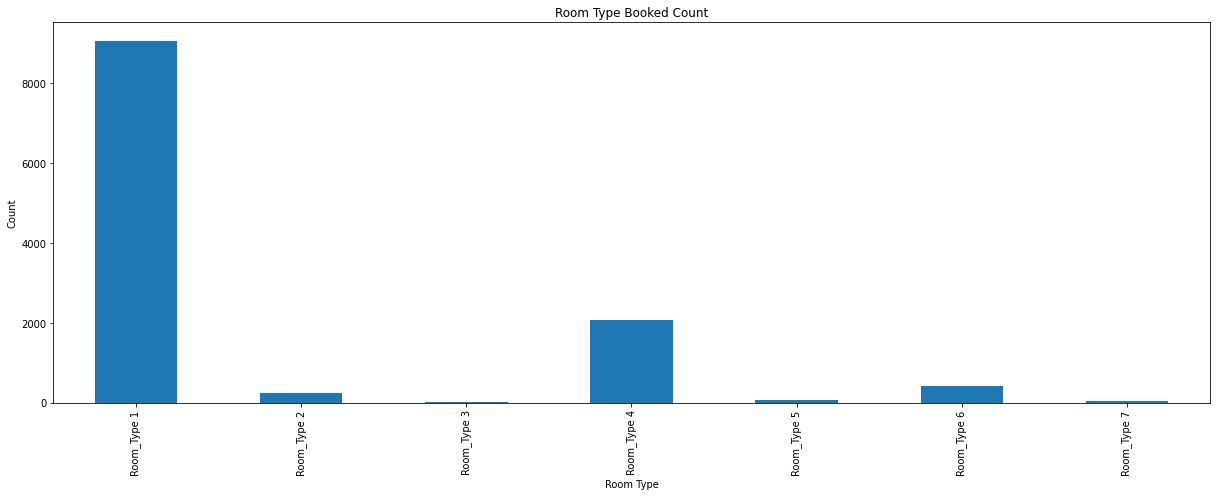

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [21]:
df.groupby(['room_type_reserved'])['booking_status'].sum().plot(kind='bar')
plt.title('Room Type Booked Count')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

categorical.room_type_reserved.value_counts()

In [22]:
# # Import label encoder 
# from sklearn import preprocessing
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'Country'. 
# df['room_type_reserved']= label_encoder.fit_transform(df['room_type_reserved']) 

In [23]:
# df.groupby(['room_type_reserved'])['booking_status'].sum().plot(kind='bar')
# plt.title('Room Type Booked Count')
# plt.xlabel('Room Type')
# plt.ylabel('Count')
# plt.show()

# categorical.room_type_reserved.value_counts()

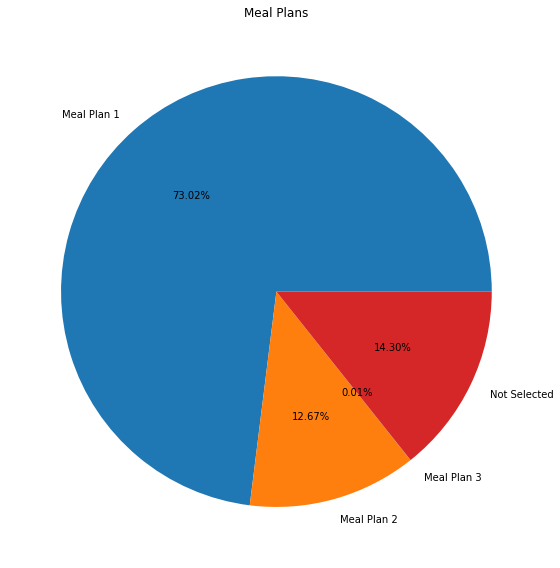

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [24]:
df_pie=df.groupby(['type_of_meal_plan'])['booking_status'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.title('Meal Plans')
plt.pie(df_pie['booking_status'], labels= df_pie['type_of_meal_plan'],autopct='%1.2f%%',)
plt.show()

categorical.type_of_meal_plan.value_counts()

In [25]:
# df['type_of_meal_plan']= label_encoder.fit_transform(df['type_of_meal_plan']) 

# df_pie=df.groupby(['type_of_meal_plan'])['booking_status'].sum().reset_index()
# plt.figure(figsize=(8,8))
# plt.title('Meal Plans')
# plt.pie(df_pie['booking_status'], labels= df_pie['type_of_meal_plan'],autopct='%1.2f%%',)
# plt.show()

# categorical.type_of_meal_plan.value_counts()

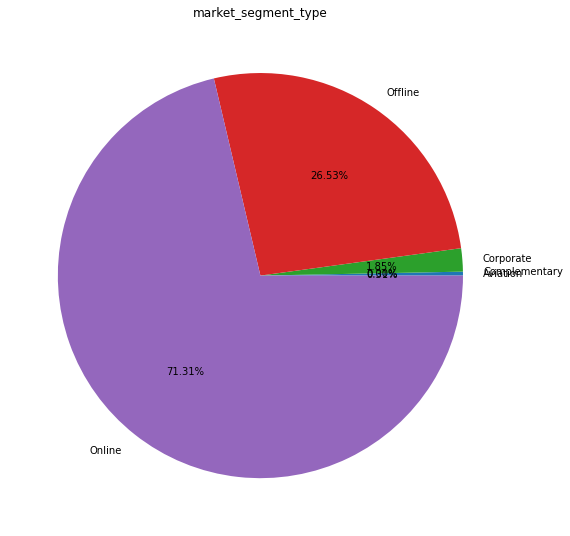

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [26]:
df_pie=df.groupby(['market_segment_type'])['booking_status'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.title('market_segment_type')
plt.pie(df_pie['booking_status'], labels= df_pie['market_segment_type'],autopct='%1.2f%%',)
plt.show()

categorical.market_segment_type.value_counts()

In [27]:
# df['market_segment_type']= label_encoder.fit_transform(df['market_segment_type']) 

# df_pie=df.groupby(['market_segment_type'])['booking_status'].sum().reset_index()
# plt.figure(figsize=(8,8))
# plt.title('market_segment_type')
# plt.pie(df_pie['booking_status'], labels= df_pie['market_segment_type'],autopct='%1.2f%%',)
# plt.show()

# categorical.market_segment_type.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

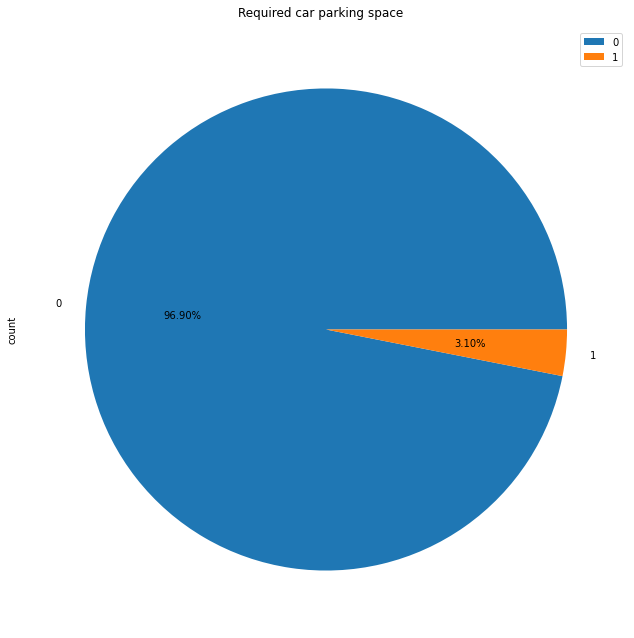

In [28]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Required car parking space',figsize=(9,9))
numerical.required_car_parking_space.value_counts()

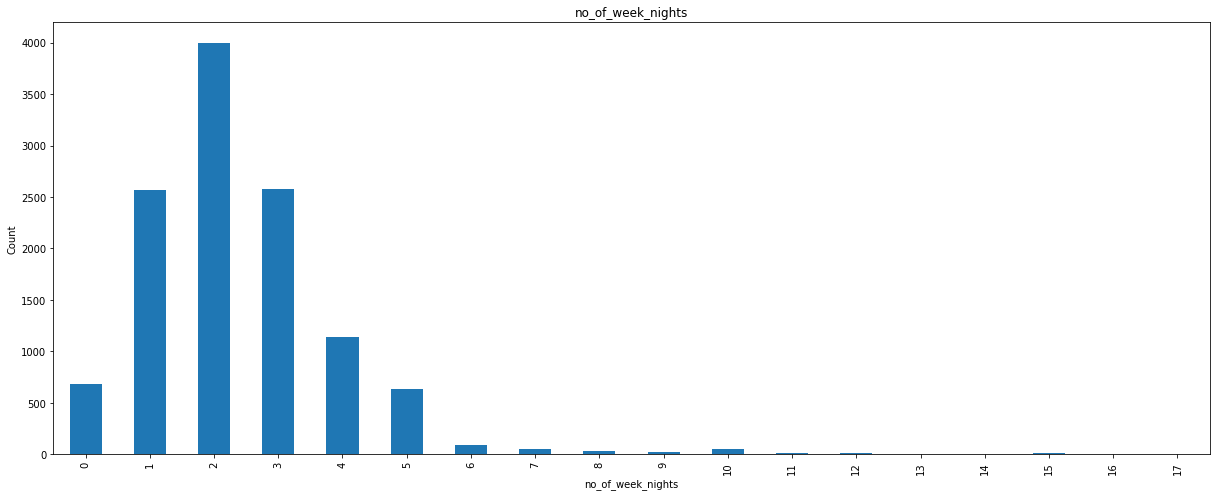

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [29]:
df.groupby(['no_of_week_nights'])['booking_status'].sum().plot(kind='bar')
plt.title('no_of_week_nights')
plt.xlabel('no_of_week_nights')
plt.ylabel('Count')
plt.show()

numerical.no_of_week_nights.value_counts()

In [30]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401,0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486,0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994,0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922,-0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205,0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552,-0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352,0.010629
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820,-0.107287


<AxesSubplot:>

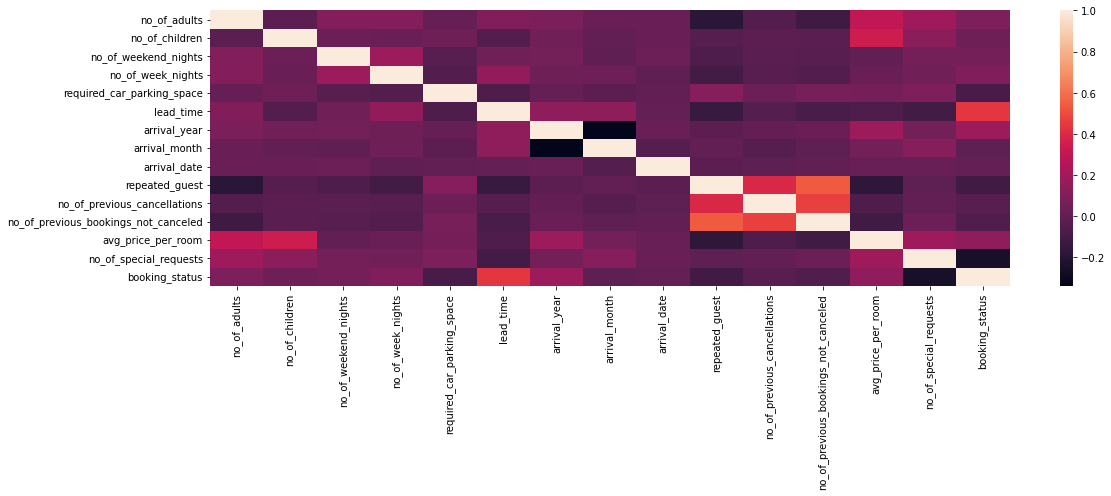

In [31]:
sns.heatmap(df.corr())

In [32]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in['lead_time','no_of_previous_bookings_not_canceled',
           'no_of_previous_cancellations','avg_price_per_room']:
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries=((df[col]>=min_IQR) & (df[col]<=max_IQR)) & filtered_entries
    df=df[filtered_entries]

print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')

Jumlah Baris Sebelum Outlier Dihapus: 36275
Jumlah Baris Sebelum Outlier Dihapus: 32675


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [33]:
df.drop('Booking_ID', axis=1, inplace=True)

In [34]:
categorical1 = ['type_of_meal_plan', 'room_type_reserved','market_segment_type']

In [35]:
for cat in categorical1:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [36]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
19784,2,1,2,0,Meal Plan 1,0,Room_Type 1,62,2018,9,...,0,0,0,0,0,0,0,0,0,1
12377,2,0,1,2,Meal Plan 1,0,Room_Type 1,168,2018,4,...,0,0,0,0,0,0,0,0,1,0
23564,2,0,0,2,Meal Plan 1,0,Room_Type 1,0,2017,9,...,0,0,0,0,0,0,0,0,0,1
27497,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2018,3,...,0,0,0,0,0,0,0,0,0,1
10696,1,0,1,3,Meal Plan 1,0,Room_Type 1,5,2018,4,...,0,0,0,0,0,1,0,0,0,0
21773,2,1,2,3,Meal Plan 1,0,Room_Type 1,32,2018,2,...,0,0,0,0,0,0,0,0,0,1
34351,2,0,0,1,Meal Plan 2,0,Room_Type 1,21,2018,3,...,0,0,0,0,0,0,0,0,0,1
23625,3,0,2,2,Meal Plan 1,0,Room_Type 4,41,2018,7,...,0,1,0,0,0,0,0,0,0,1
32350,1,0,0,3,Meal Plan 1,0,Room_Type 4,0,2018,8,...,0,1,0,0,0,0,0,0,0,1
26300,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_clean = df.drop(['type_of_meal_plan', 'room_type_reserved','market_segment_type'],axis=1)
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,0,0,0,0,0,0,0,0,0,1
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,...,0,0,0,0,0,0,0,0,0,1
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,...,0,1,0,0,0,0,0,0,0,1
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,...,0,0,0,0,0,0,0,0,1,0
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,...,0,1,0,0,0,0,0,0,0,1
10,1,0,1,0,Not Selected,0,Room_Type 1,0,2018,9,...,0,0,0,0,0,0,0,0,0,1


In [38]:
X = df_clean.drop(columns='booking_status') 
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
y = df_clean['booking_status'] 
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split,cross_validate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
precision_knn = precision_score(y_test, predicted_knn)
recall_knn = recall_score(y_test, predicted_knn)
 
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)

akurasi_knn = (accuracy_score(y_test, predicted_knn)*100)
print("KNN accuracy:",akurasi_knn)

Precision:  0.743894802755166
Recall:  0.5638348362600855
KNN accuracy: 79.67865340474368


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, make_scorer
print("confussion matrix")
print(confusion_matrix(y_test, predicted_knn))
print("-------------------------------------------")
print("Accuracy of KNN: {:.2f}%".format(akurasi_knn))
print(classification_report(y_test,predicted_knn))
print(f'ROC_AUC score: {roc_auc_score(y_test, predicted_knn)}.')

confussion matrix
[[4019  409]
 [ 919 1188]]
-------------------------------------------
Accuracy of KNN: 79.68%
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4428
           1       0.74      0.56      0.64      2107

    accuracy                           0.80      6535
   macro avg       0.78      0.74      0.75      6535
weighted avg       0.79      0.80      0.79      6535

ROC_AUC score: 0.7357340396295912.


In [43]:
# # Applying 10-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# scores_knn = cross_val_score(knn_model, X, y, cv = 10, scoring='accuracy')
# print('Cross-validation scores_knn:{}'.format(scores_knn))

# print("-------------------------------------------")

# # compute Average cross-validation score
# print("Accuracy: %.3f%% (%.3f%%)" % (scores_knn.mean()*100.0, scores_knn.std()*100.0))

# print("-------------------------------------------")

# # Confusion Matrix
# from sklearn.model_selection import cross_val_predict
# y_pred = cross_val_predict(knn_model, X, y, cv=10)
# print("CONFUSION MATRIX")
# cnf_matrix=confusion_matrix(y, y_pred)
# print(cnf_matrix)
# print("-------------------------------------------")

# # Recall Score
# print('RECALL')
# recall = cross_val_score(knn_model, X, y, cv = 10, scoring='recall')
# print('Recall Score:{}'.format(recall))
# print("Recall Score (Mean): %.3f%% (%.3f%%)" % (recall.mean()*100.0, recall.std()*100.0))

# print("-------------------------------------------")

# # Recall Score
# print('PRECISION')
# precision = cross_val_score(knn_model, X, y, cv = 10, scoring='precision')
# print('Precision Score:{}'.format(precision))
# print("Precision Score (Mean): %.3f%% (%.3f%%)" % (precision.mean()*100.0, precision.std()*100.0))

# print("-------------------------------------------")

# # F1 Score
# print('F1-SCORE')
# f1_score = {'f1_score' : make_scorer(f1_score)}
# results = cross_validate(knn_model, X, y, cv = 10, scoring=f1_score)
# print (results)

# print("-------------------------------------------")

# # ROC_AUC
# print('ROC_AUC')
# auc = cross_val_score(knn_model, X, y, cv=10, scoring='roc_auc')
# print('ROC_AUC Score:{}'.format(auc))
# print("ROC_AUC Score (Mean): %.3f%% (%.3f%%)" % (auc.mean()*100.0, auc.std()*100.0))

In [44]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)
predicted_svm = clf.predict(X_test)
accuracy_svm = clf.score(X_test,y_test)
precision_svm = precision_score(y_test, predicted_svm)
recall_svm = recall_score(y_test, predicted_svm)
 
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)

akurasi_svm = (accuracy_score(y_test, predicted_svm)*100)
print("SVM accuracy:",akurasi_svm)

Precision:  0.7275985663082437
Recall:  0.3853820598006645
SVM accuracy: 75.53175210405509


In [45]:
print("confussion matrix")
print(confusion_matrix(y_test, predicted_svm))
print("-------------------------------------------")
print("Accuracy of SVM: {:.2f}%".format(akurasi_svm))
print(classification_report(y_test,predicted_svm))
print(f'ROC_AUC score: {roc_auc_score(y_test, predicted_svm)}.')

confussion matrix
[[4124  304]
 [1295  812]]
-------------------------------------------
Accuracy of SVM: 75.53%
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      4428
           1       0.73      0.39      0.50      2107

    accuracy                           0.76      6535
   macro avg       0.74      0.66      0.67      6535
weighted avg       0.75      0.76      0.73      6535

ROC_AUC score: 0.6583640199635662.


In [46]:
# # Applying 10-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# scores_svm = cross_val_score(clf, X, y, cv = 10, scoring='accuracy')
# print('Cross-validation scores_knn:{}'.format(scores_svm))

# print("-------------------------------------------")

# # compute Average cross-validation score
# print("Accuracy: %.3f%% (%.3f%%)" % (scores_svm.mean()*100.0, scores_knn.std()*100.0))

# print("-------------------------------------------")

# # Confusion Matrix
# from sklearn.model_selection import cross_val_predict
# y_pred = cross_val_predict(clf, X, y, cv=10)
# print("CONFUSION MATRIX")
# cnf_matrix=confusion_matrix(y, predicted_svm)
# print(cnf_matrix)
# print("-------------------------------------------")

# # Recall Score
# print('RECALL')
# recall = cross_val_score(clf, X, y, cv = 10, scoring='recall')
# print('Recall Score:{}'.format(recall))
# print("Recall Score (Mean): %.3f%% (%.3f%%)" % (recall.mean()*100.0, recall.std()*100.0))

# print("-------------------------------------------")

# # Recall Score
# print('PRECISION')
# precision = cross_val_score(clf, X, y, cv = 10, scoring='precision')
# print('Precision Score:{}'.format(precision))
# print("Precision Score (Mean): %.3f%% (%.3f%%)" % (precision.mean()*100.0, precision.std()*100.0))

# print("-------------------------------------------")

# # F1 Score
# print('F1-SCORE')
# f1_score = {'f1_score' : make_scorer(f1_score)}
# results = cross_validate(clf, X, y, cv = 10, scoring=f1_score)
# print (results)

# print("-------------------------------------------")

# # ROC_AUC
# print('ROC_AUC')
# auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
# print('ROC_AUC Score:{}'.format(auc))
# print("ROC_AUC Score (Mean): %.3f%% (%.3f%%)" % (auc.mean()*100.0, auc.std()*100.0))

In [47]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)
predicted_xgb = xgb_cl.predict(X_test)
accuracy_xgb = xgb_cl.score(X_test,y_test)
precision_xgb = precision_score(y_test, predicted_xgb)
recall_xgb = recall_score(y_test, predicted_xgb)
 
print('Precision: ',precision_xgb)
print('Recall: ',recall_xgb)
      
akurasi_xgb = (accuracy_score(y_test, predicted_xgb)*100)
print("SVM accuracy:",akurasi_xgb)

Precision:  0.8521162672106068
Recall:  0.7930707166587565
SVM accuracy: 88.89058913542463


In [48]:
print("confussion matrix")
print(confusion_matrix(y_test, predicted_xgb))
print("-------------------------------------------")
print("Accuracy of XGB: {:.2f}%".format(akurasi_xgb))
print(classification_report(y_test,predicted_xgb))
print(f'ROC_AUC score: {roc_auc_score(y_test, predicted_xgb)}.')

confussion matrix
[[4138  290]
 [ 436 1671]]
-------------------------------------------
Accuracy of XGB: 88.89%
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4428
           1       0.85      0.79      0.82      2107

    accuracy                           0.89      6535
   macro avg       0.88      0.86      0.87      6535
weighted avg       0.89      0.89      0.89      6535

ROC_AUC score: 0.863789197534437.


In [50]:
from catboost import CatBoostClassifier

model_params = {
    'iterations': 10, 
    'loss_function': 'MultiClass',
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}
ctb_cl = CatBoostClassifier(**model_params)
ctb_cl.fit(X_train,y_train)

predicted_ctb = ctb_cl.predict(X_test)
accuracy_ctb = ctb_cl.score(X_test,y_test)
precision_ctb = precision_score(y_test, predicted_ctb)
recall_ctb = recall_score(y_test, predicted_ctb)
 
print('Precision: ',precision_ctb)
print('Recall: ',recall_ctb)

akurasi_ctb = (accuracy_score(y_test, predicted_ctb)*100)
print("CatBoost accuracy:",akurasi_ctb)

Learning rate set to 0.5
0:	learn: 0.5229132	total: 10.7ms	remaining: 96.1ms
1:	learn: 0.4550967	total: 19.4ms	remaining: 77.4ms
2:	learn: 0.4273511	total: 28.3ms	remaining: 66.1ms
3:	learn: 0.4087974	total: 36.1ms	remaining: 54.2ms
4:	learn: 0.3967417	total: 43.9ms	remaining: 43.9ms
5:	learn: 0.3826252	total: 53.1ms	remaining: 35.4ms
6:	learn: 0.3753397	total: 61ms	remaining: 26.2ms
7:	learn: 0.3722176	total: 68.1ms	remaining: 17ms
8:	learn: 0.3664273	total: 76.3ms	remaining: 8.48ms
9:	learn: 0.3625933	total: 83.6ms	remaining: 0us
Precision:  0.8119810201660735
Recall:  0.6497389653535833
CatBoost accuracy: 83.85615914307574


In [51]:
print("confussion matrix")
print(confusion_matrix(y_test, predicted_ctb))
print("-------------------------------------------")
print("Accuracy of Catboost: {:.2f}%".format(akurasi_ctb))
print(classification_report(y_test,predicted_ctb))
print(f'ROC_AUC score: {roc_auc_score(y_test, predicted_ctb)}.')

confussion matrix
[[4111  317]
 [ 738 1369]]
-------------------------------------------
Accuracy of Catboost: 83.86%
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4428
           1       0.81      0.65      0.72      2107

    accuracy                           0.84      6535
   macro avg       0.83      0.79      0.80      6535
weighted avg       0.84      0.84      0.83      6535

ROC_AUC score: 0.7890745413940455.


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


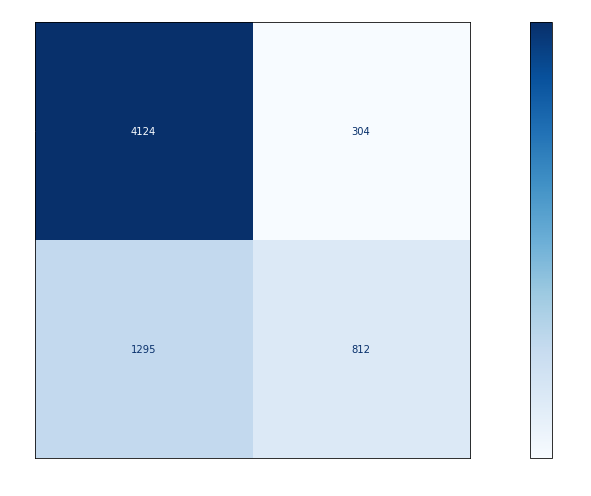

In [52]:
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


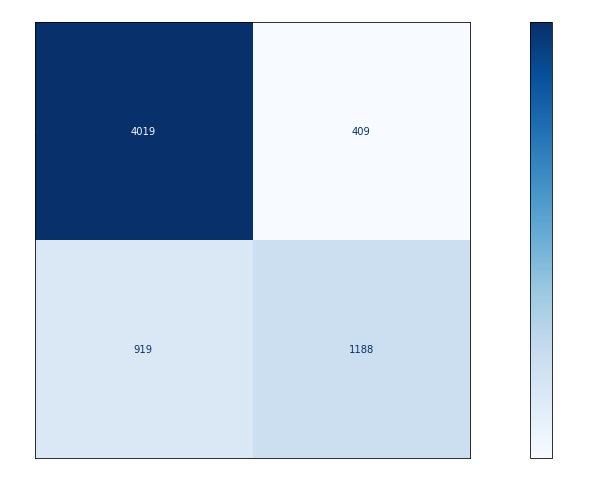

In [54]:
color = 'white'
matrix = plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


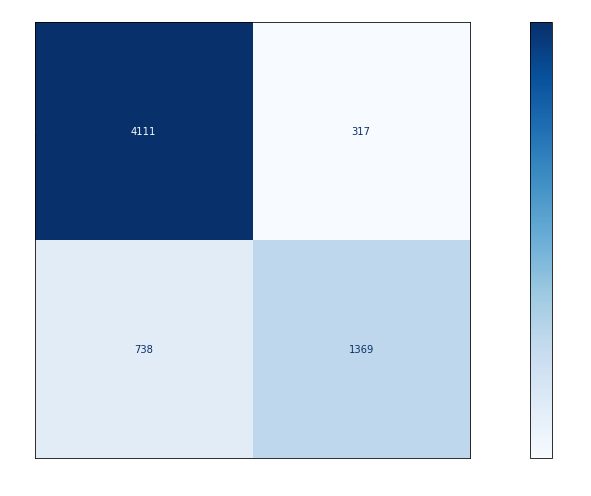

In [55]:
color = 'white'
matrix = plot_confusion_matrix(ctb_cl, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


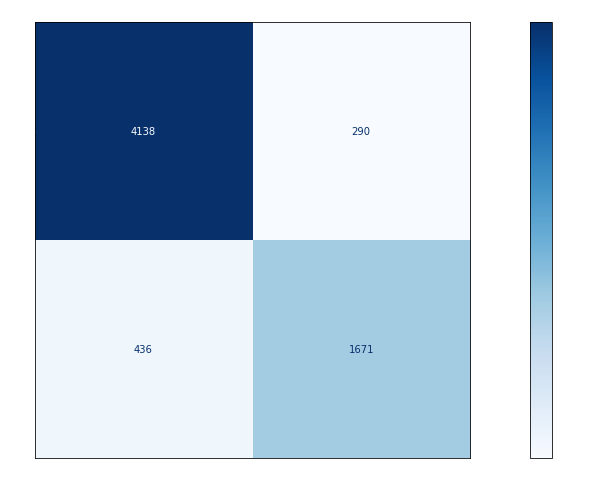

In [56]:
color = 'white'
matrix = plot_confusion_matrix(xgb_cl, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()